<a href="https://colab.research.google.com/github/bijaykahar/Rice-Leaf-Disease-Detection-/blob/master/VGG_Rice_Leaf_Data_%2B_Transfer_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os 
#after Image Augmentation the 40 images becomes 851 images 
print(len(os.listdir('/content/drive/My Drive/RiceLeafData/Train/Bacterial Leaf Blub')))

811


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/RiceLeafData/Train'
valid_path = '/content/drive/My Drive/RiceLeafData/Test'

In [5]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/RiceLeafData/Train/*')

In [8]:
folders

['/content/drive/My Drive/RiceLeafData/Train/Bacterial Leaf Blub',
 '/content/drive/My Drive/RiceLeafData/Train/Leaf Smut',
 '/content/drive/My Drive/RiceLeafData/Train/Brown Spot']

In [9]:
len(folders)

3

In [10]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2455 images belonging to 3 classes.


In [16]:

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 119 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
77/77 [==============================] - 2074s 27s/step - loss: 0.7549 - accuracy: 0.6794 - val_loss: 0.2910 - val_accuracy: 0.9160
Epoch 2/20
77/77 [==============================] - 98s 1s/step - loss: 0.3656 - accuracy: 0.8717 - val_loss: 0.2616 - val_accuracy: 0.8992
Epoch 3/20
77/77 [==============================] - 98s 1s/step - loss: 0.2692 - accuracy: 0.9039 - val_loss: 0.1782 - val_accuracy: 0.9328
Epoch 4/20
77/77 [==============================] - 98s 1s/step - loss: 0.2061 - accuracy: 0.9385 - val_loss: 0.2088 - val_accuracy: 0.9160
Epoch 5/20
77/77 [==============================] - 98s 1s/step - loss: 0.2031 - accuracy: 0.9413 - val_loss: 0.1542 - val_accuracy: 0.9412
Epoch 6/20
77/77 [==============================] - 98s 1s/step - loss: 0.1704 - accuracy: 0.9491 - val_loss: 0.2013 - val_accuracy: 0.9160
Epoch 7/20
77/77 [==============================] - 98s 1s/step - loss: 0.1555 - 

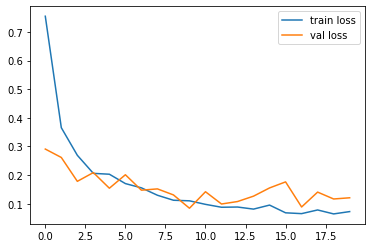

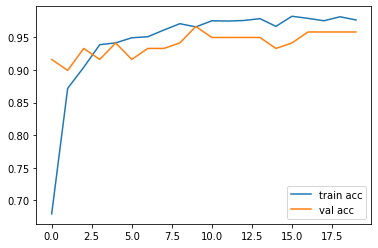

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_vgg16_rice_leaf.h5')

In [25]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[7.3176354e-01, 3.9324291e-02, 2.2891214e-01],
       [6.8812224e-04, 9.9891114e-01, 4.0074167e-04],
       [1.9083628e-09, 1.4364932e-06, 9.9999857e-01],
       [9.6718621e-01, 3.1501538e-04, 3.2498863e-02],
       [1.7195727e-07, 9.9991167e-01, 8.8153727e-05],
       [9.9346280e-01, 6.4956639e-03, 4.1555515e-05],
       [9.7036746e-06, 6.9071520e-03, 9.9308312e-01],
       [1.9101240e-03, 9.9806029e-01, 2.9652947e-05],
       [3.9908759e-06, 2.8241501e-04, 9.9971360e-01],
       [1.0935843e-04, 9.9943405e-01, 4.5660144e-04],
       [6.6883907e-09, 9.9912554e-01, 8.7452854e-04],
       [9.4330198e-01, 5.5334441e-02, 1.3635255e-03],
       [1.7135800e-10, 9.9990880e-01, 9.1196620e-05],
       [8.1005353e-05, 7.8226691e-03, 9.9209630e-01],
       [2.2700453e-06, 9.6784002e-01, 3.2157719e-02],
       [2.7082482e-05, 1.2318547e-03, 9.9874109e-01],
       [9.9608563e-03, 9.8992926e-01, 1.0983923e-04],
       [2.3880517e-05, 7.0635426e-05, 9.9990547e-01],
       [5.5661042e-07, 3.528

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0,
       1, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       1, 1, 0, 2, 0, 2, 2, 1, 2])